Episode  1, epsilon   0.98, batch size  200, ep return 9961606.5
Episode  2, epsilon   0.96, batch size  400, ep return 7619359.2
Episode  3, epsilon   0.94, batch size  600, ep return 10546526.0
Episode  4, epsilon   0.92, batch size  800, ep return 12628610.6
Episode  5, epsilon   0.90, batch size 1000, ep return 12224542.1
Episode  6, epsilon   0.88, batch size 1200, ep return 8764924.4
Episode  7, epsilon   0.86, batch size 1400, ep return 6722393.0
Episode  8, epsilon   0.84, batch size 1600, ep return 15020346.8
Episode  9, epsilon   0.82, batch size 1800, ep return 5217149.7
Episode 10, epsilon   0.80, batch size 2000, ep return 8830021.9
Episode 11, epsilon   0.78, batch size 2200, ep return 8352967.4
Episode 12, epsilon   0.76, batch size 2400, ep return 11443872.1
Episode 13, epsilon   0.74, batch size 2600, ep return 4723543.0
Episode 14, epsilon   0.72, batch size 2800, ep return 13681999.4
Episode 15, epsilon   0.71, batch size 3000, ep return 8077411.9
Episode 16, epsilon

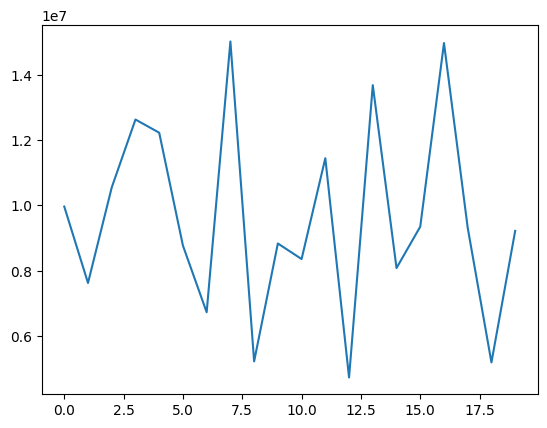

In [1]:
from train import ProjectAgent
from env_hiv import HIVPatient
from gymnasium.wrappers import TimeLimit
from train import ReplayBuffer
import torch.nn as nn
from train import HIVcnn
import numpy as np
import torch
from evaluate import evaluate_HIV
import matplotlib.pyplot as plt

agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env, 20)
agent.save("model-HIV.pth")
plt.plot(ep_return)

Episode  1, epsilon   0.98, batch size 400200, ep return 11365469.2
Episode  2, epsilon   0.96, batch size 400400, ep return 8331603.0
Episode  3, epsilon   0.94, batch size 400600, ep return 8360856.2
Episode  4, epsilon   0.92, batch size 400800, ep return 9254654.7
Episode  5, epsilon   0.90, batch size 401000, ep return 7866704.9
Episode  6, epsilon   0.88, batch size 401200, ep return 9023825.1
Episode  7, epsilon   0.86, batch size 401400, ep return 7348681.7
Episode  8, epsilon   0.84, batch size 401600, ep return 9262642.8
Episode  9, epsilon   0.82, batch size 401800, ep return 15309162.1
Episode 10, epsilon   0.80, batch size 402000, ep return 10450235.8


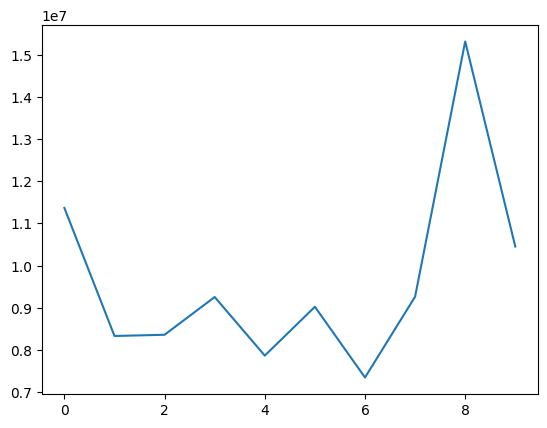

In [5]:
env = TimeLimit(
    env=HIVPatient(domain_randomization=False), max_episode_steps=200
)
ep_return = agent.train(env, 10)
agent.save("model-HIV3.pth")
plt.plot(ep_return)

In [2]:
obs, info = env.reset()
done = False
truncated = False
episode_reward = 0
while not done and not truncated:
    action = agent.act(obs)
    print(action, end=" ")
    obs, reward, done, truncated, _ = env.step(action)
    episode_reward += reward
print(episode_reward)

3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 545647081.2281642


In [3]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent: float = evaluate_HIV(agent=agent, nb_episode=5)
score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(f"Score agent: {score_agent}")
print(f"Score agent with domain randomization: {score_agent_dr}")

Score agent: 6787976.815833555
Score agent with domain randomization: 1596987150.0977883


In [4]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(score_agent_dr)

1598458882.595654


In [ ]:
agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env, 1000)
agent.save_model("model-HIV.pth")